# Green AI Project

## Getting the AirParif data

In [1]:
import dataRetriever as dr
import pandas as pd
import quickPlotter as qp
import airparifDataPrep
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

In [13]:
hourly_df, daily_df = airparifDataPrep.getAirparifData("data")

## Analysis

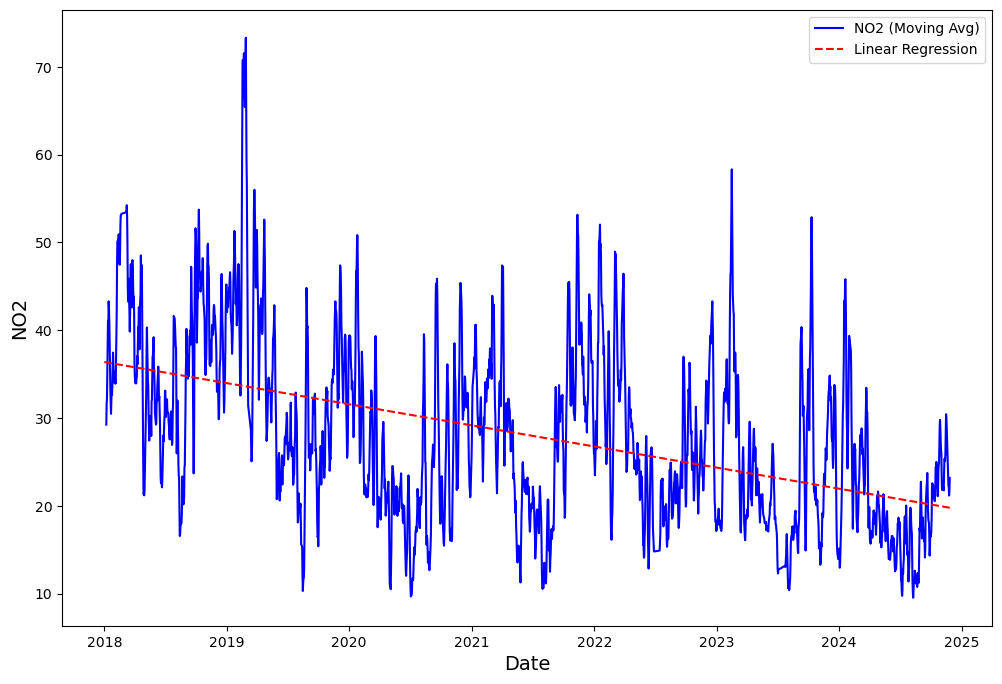

In [16]:
plot = qp.quickRegPlot(daily_df, "date", "NO2", True, 7)